In [ ]:
TASK 1 Healthcare Patient Risk Analysis

In [ ]:
import zipfile
import os

zip_path = "/content/archive (1).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("Extraction completed!")
print(os.listdir("/content"))


Extraction completed!
['.config', 'healthcare_dataset.csv', 'archive (1).zip', '.ipynb_checkpoints', 'sample_data']


In [ ]:
import pandas as pd

csv_path = "/content/healthcare_dataset.csv"

df = pd.read_csv(csv_path)

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Libraries Loaded Successfully ✔️")


Libraries Loaded Successfully ✔️


In [15]:
df = pd.read_csv("/content/healthcare_dataset.csv")   # CHANGE PATH IF NEEDED
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


TASK1

In [16]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


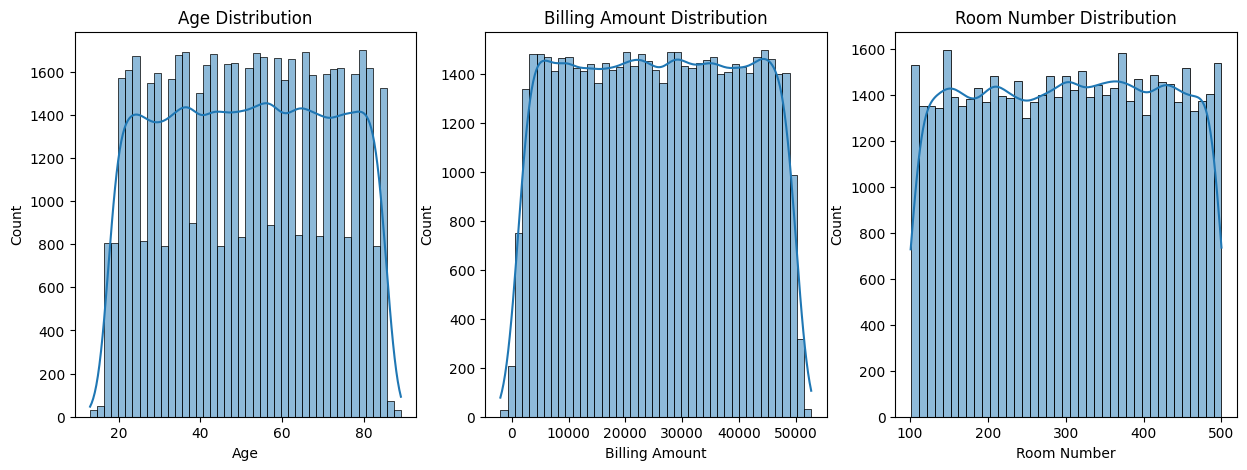

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")

plt.subplot(1,3,2)
sns.histplot(df['Billing Amount'], kde=True)
plt.title("Billing Amount Distribution")

plt.subplot(1,3,3)
sns.histplot(df['Room Number'], kde=True)
plt.title("Room Number Distribution")

plt.show()


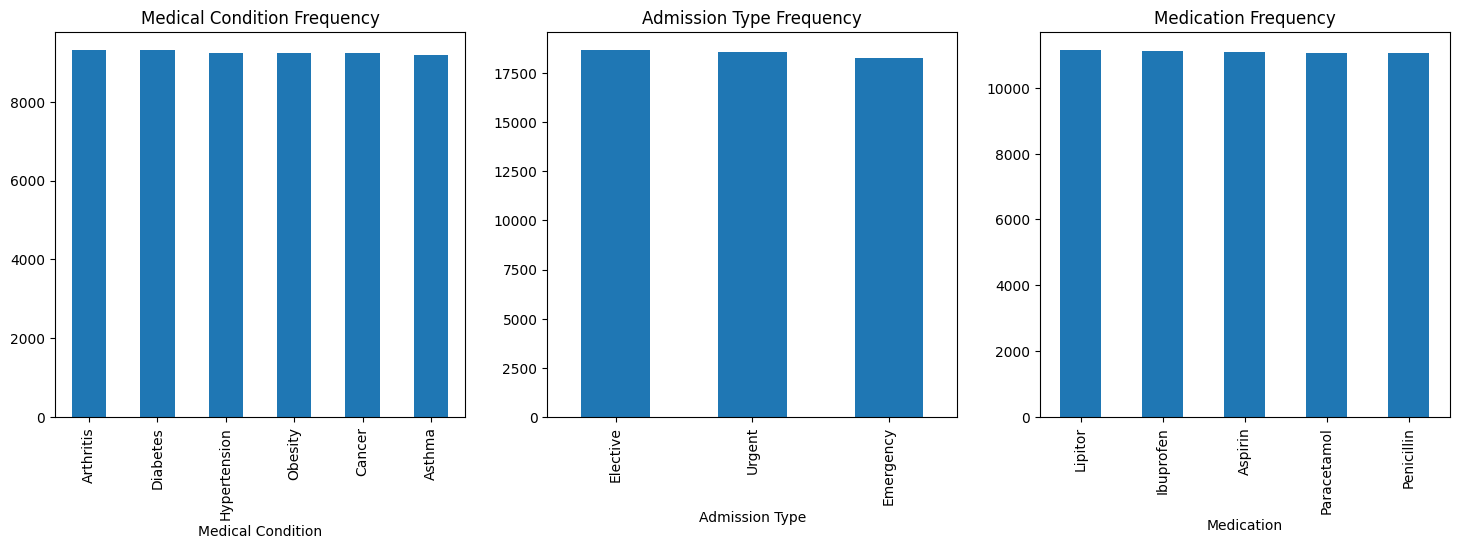

In [18]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
df['Medical Condition'].value_counts().plot(kind="bar")
plt.title("Medical Condition Frequency")

plt.subplot(1,3,2)
df['Admission Type'].value_counts().plot(kind="bar")
plt.title("Admission Type Frequency")

plt.subplot(1,3,3)
df['Medication'].value_counts().plot(kind="bar")
plt.title("Medication Frequency")

plt.show()


In [ ]:
TASK 2 — SUPERVISED LEARNING

In [19]:
df_model = df.drop(['Name', 'Doctor', 'Hospital',
                    'Date of Admission', 'Discharge Date'], axis=1)


In [20]:
df_encoded = pd.get_dummies(df_model, drop_first=True)
df_encoded.head()


,Age,Billing Amount,Room Number,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,30,18856.281306,328,True,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,62,33643.327287,265,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
2,76,27955.096079,205,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,28,37909.782410,450,False,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False
4,43,14238.317814,458,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [21]:
test_col = [col for col in df_encoded.columns if "Test" in col][0]
print("Test Results column detected as:", test_col)


Test Results column detected as: Test Results_Inconclusive


In [22]:
X = df_encoded.drop(test_col, axis=1)
y = df_encoded[test_col]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7172072072072072

Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.80      0.79      7483
        True       0.57      0.54      0.55      3617

    accuracy                           0.72     11100
   macro avg       0.68      0.67      0.67     11100
weighted avg       0.71      0.72      0.71     11100



In [26]:
pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}).head(10)


,Actual,Predicted
0,True,True
1,False,True
2,True,True
3,False,True
4,True,True
5,False,False
6,True,False
7,False,False
8,True,False
9,False,False


TASK 3 — UNSUPERVISED LEARNING

In [27]:
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['Billing_Anomaly'] = df['Billing Amount'].apply(
    lambda x: "Anomaly" if x < lower or x > upper else "Normal"
)

df[df['Billing_Anomaly'] == 'Anomaly'].head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Billing_Anomaly


In [28]:
df['Billing_Anomaly'].value_counts()


,count
Billing_Anomaly,
Normal,55500


In [29]:
print("Values above", upper, "are rare expensive bills.")
print("Values below", lower, "are unusually low bills (possible errors).")


Values above 74689.43411091428 are rare expensive bills.
Values below -23627.701022764355 are unusually low bills (possible errors).


TASK 4 — AI DOCTOR RECOMMENDATION

In [30]:
def generate_doctor_note(age, condition, medication, predicted):

    if predicted == 1:
        status = "Positive Test Result"
        advice = (
            "Immediate follow-up is recommended. Monitor symptoms, "
            "stay hydrated, follow medication strictly."
        )
    else:
        status = "Normal Test Result"
        advice = (
            "Condition appears stable. Maintain medication routine "
            "and continue regular health check-ups."
        )

    return f"""
    -------------------------------
    🩺 AI Doctor Recommendation
    -------------------------------
    Age: {age}
    Medical Condition: {condition}
    Medication: {medication}

    Diagnosis: **{status}**

    Recommendation:
    {advice}

    Contact a healthcare provider if symptoms worsen.
    """


In [31]:
sample = df.iloc[0]

print(
    generate_doctor_note(
        age=sample['Age'],
        condition=sample['Medical Condition'],
        medication=sample['Medication'],
        predicted=y_pred[0]
    )
)



    -------------------------------
    🩺 AI Doctor Recommendation
    -------------------------------
    Age: 30
    Medical Condition: Cancer
    Medication: Paracetamol

    Diagnosis: **Positive Test Result**

    Recommendation:
    Immediate follow-up is recommended. Monitor symptoms, stay hydrated, follow medication strictly.

    Contact a healthcare provider if symptoms worsen.
    


In [ ]:
TASK2 -Consumption Analysis

In [33]:
df = pd.read_csv("/content/powerconsumption.csv")
print(df.columns.tolist())


['Datetime', 'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']


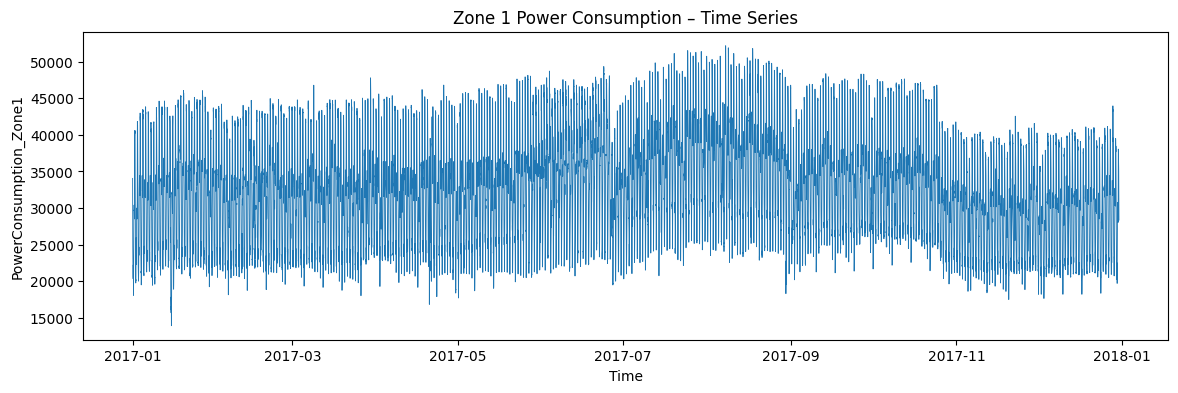

Missing values: 0
Abnormal readings: 0


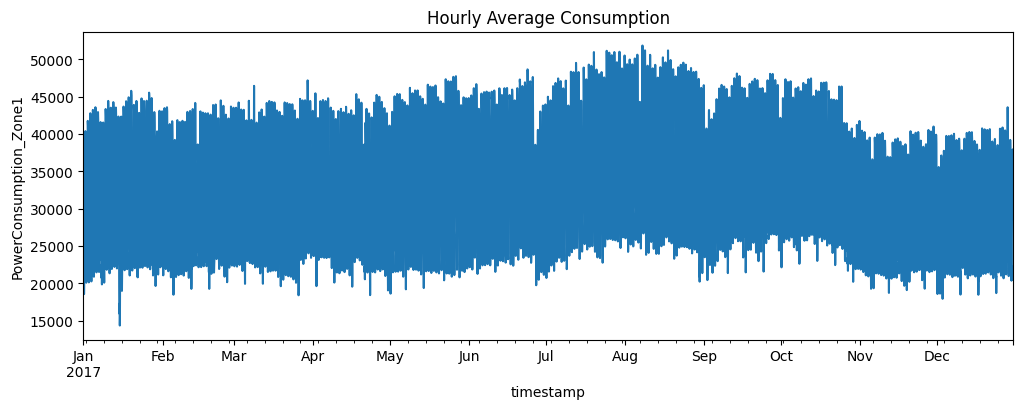

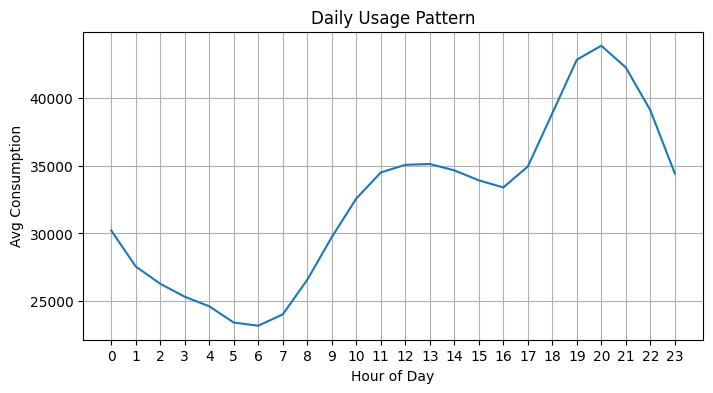

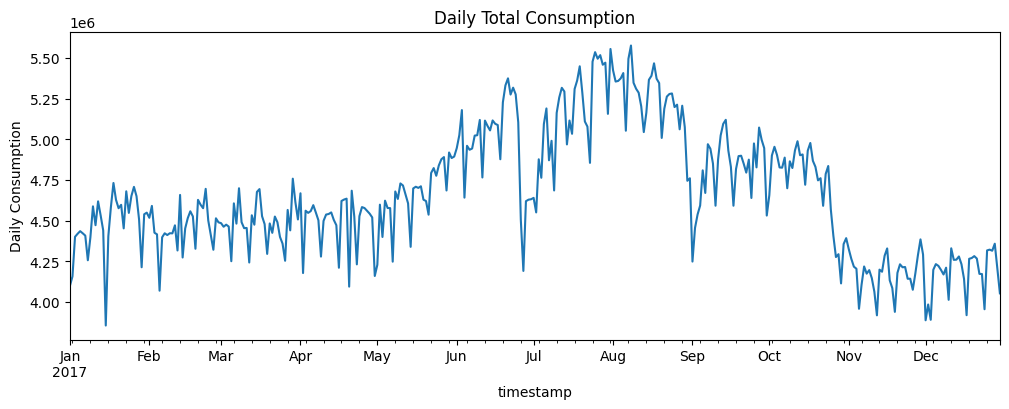

MAE = 773.1878071185758  RMSE = 1119.0343424526247


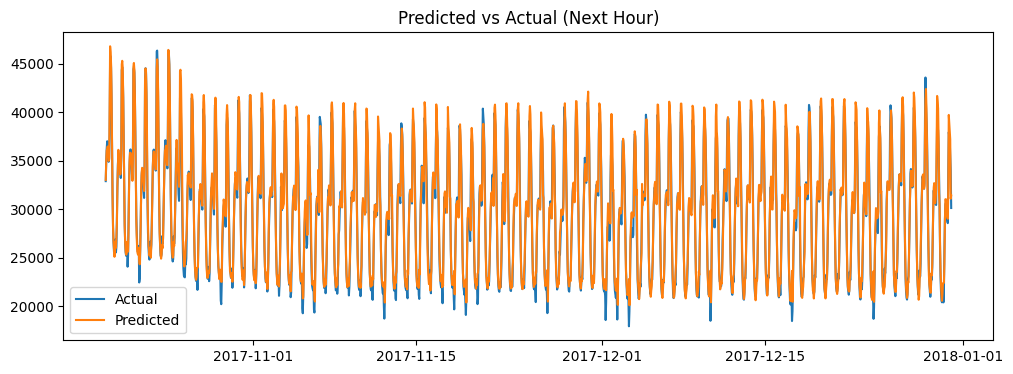

Total anomalies: 84


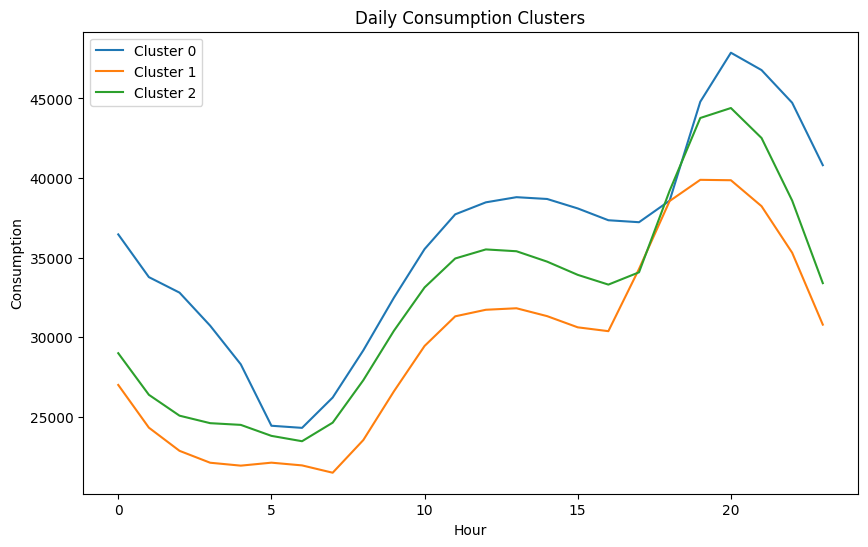

Example prediction: 33007.94838654999
Category: Medium Usage
Suggestion: Moderate usage. Consider basic power-saving habits.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

df = pd.read_csv("/content/powerconsumption.csv")

df['timestamp'] = pd.to_datetime(df['Datetime'], errors='coerce')
df = df.dropna(subset=['timestamp']).sort_values('timestamp').reset_index(drop=True)
df.set_index('timestamp', inplace=True)

num_cols = ['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows',
            'PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

plt.figure(figsize=(14,4))
plt.plot(df.index, df['PowerConsumption_Zone1'], linewidth=0.6)
plt.title("Zone 1 Power Consumption – Time Series")
plt.ylabel("PowerConsumption_Zone1")
plt.xlabel("Time")
plt.show()

missing = df['PowerConsumption_Zone1'].isna().sum()
print("Missing values:", missing)

abnormal = df[df['PowerConsumption_Zone1'].isna()]
print("Abnormal readings:", len(abnormal))

df_hour = df['PowerConsumption_Zone1'].resample('H').mean()

plt.figure(figsize=(12,4))
df_hour.plot()
plt.title("Hourly Average Consumption")
plt.ylabel("PowerConsumption_Zone1")
plt.show()

hourly_profile = df_hour.groupby(df_hour.index.hour).mean()

plt.figure(figsize=(8,4))
plt.plot(hourly_profile.index, hourly_profile.values)
plt.xlabel("Hour of Day")
plt.ylabel("Avg Consumption")
plt.title("Daily Usage Pattern")
plt.xticks(range(24))
plt.grid(True)
plt.show()

daily_sum = df['PowerConsumption_Zone1'].resample('D').sum()

plt.figure(figsize=(12,4))
daily_sum.plot()
plt.title("Daily Total Consumption")
plt.ylabel("Daily Consumption")
plt.show()

high_threshold = daily_sum.quantile(0.90)
low_threshold = daily_sum.quantile(0.10)

series = df_hour.copy().interpolate(limit=3)

def make_supervised(series, n_lags=24, horizon=1):
    Xs, ys, idx = [], [], []
    values = series.values
    for i in range(n_lags, len(values)-horizon+1):
        Xs.append(values[i-n_lags:i])
        ys.append(values[i + horizon - 1])
        idx.append(series.index[i])
    return np.array(Xs), np.array(ys), idx

n_lags = 24
X, y, idx = make_supervised(series, n_lags=n_lags, horizon=1)
X_flat = X.reshape(X.shape[0], X.shape[1])

split_idx = int(0.8 * len(X_flat))
X_train, X_test = X_flat[:split_idx], X_flat[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
idx_train, idx_test = idx[:split_idx], idx[split_idx:]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("MAE =", mae, " RMSE =", rmse)

plt.figure(figsize=(12,4))
plt.plot(idx_test, y_test, label='Actual')
plt.plot(idx_test, y_pred, label='Predicted')
plt.title("Predicted vs Actual (Next Hour)")
plt.legend()
plt.show()

iso = IsolationForest(contamination=0.01, random_state=42)
hour_vals = series.values.reshape(-1,1)
iso.fit(hour_vals)
anomaly_labels = iso.predict(hour_vals)

hourly_anomalies = series.to_frame(name='PowerConsumption_Zone1')
hourly_anomalies['anomaly'] = anomaly_labels

print("Total anomalies:", (hourly_anomalies['anomaly']==-1).sum())

daily_resampled = df['PowerConsumption_Zone1'].resample('H').mean().fillna(method='ffill')
grouped = daily_resampled.groupby(daily_resampled.index.date)

daily_list = []
daily_index = []

for day, group in grouped:
    arr = group.values[:24]
    if len(arr) < 24:
        arr = np.pad(arr, (0, 24 - len(arr)), constant_values=np.nan)
    daily_list.append(arr)
    daily_index.append(pd.to_datetime(day))

daily_arr = np.array(daily_list)
daily_df = pd.DataFrame(daily_arr, index=daily_index)
daily_df = daily_df.interpolate(axis=1).ffill(axis=1).bfill(axis=1)

scaler = StandardScaler()
daily_scaled = scaler.fit_transform(daily_df.values)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(daily_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
for i in range(k):
    plt.plot(range(24), centers[i], label=f"Cluster {i}")
plt.legend()
plt.title("Daily Consumption Clusters")
plt.xlabel("Hour")
plt.ylabel("Consumption")
plt.show()

vals = series.dropna().values
low_thr = np.percentile(vals, 33)
high_thr = np.percentile(vals, 66)

def category(v):
    if v <= low_thr:
        return "Low Usage"
    elif v <= high_thr:
        return "Medium Usage"
    else:
        return "High Usage"

def suggestion(cat):
    if cat == "Low Usage":
        return "Usage is low. Good efficiency maintained."
    if cat == "Medium Usage":
        return "Moderate usage. Consider basic power-saving habits."
    return "High usage detected. Try reducing heavy appliance load."

example = y_pred[0]
cat = category(example)

print("Example prediction:", float(example))
print("Category:", cat)
print("Suggestion:", suggestion(cat))


In [ ]:
TASK 3 Air Quality (AQI) Forecasting & Pattern Analysis

Using file: /content/Bengaluru_AQIBulletins.csv
Columns: ['date', 'City', 'No. Stations', 'Air Quality', 'Index Value', 'Prominent Pollutant']
Available cities (sample): ['Bengaluru']
Selected city: Bengaluru


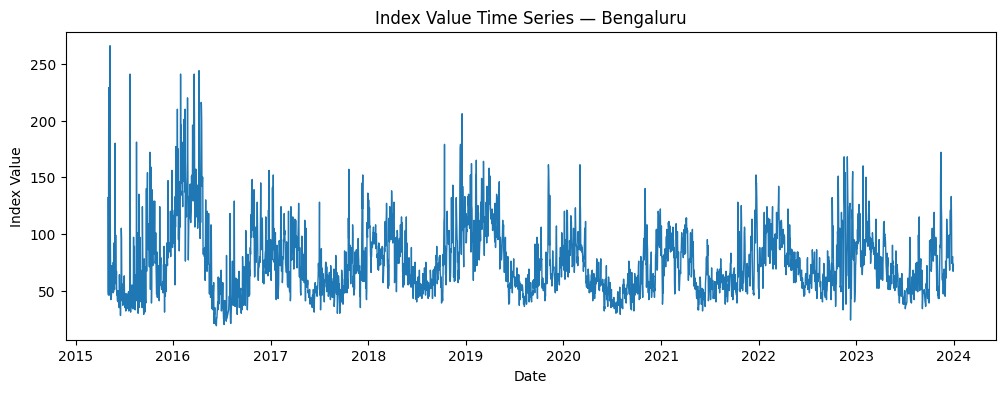

Missing Index Value count: 0
Negative Index Value readings (count): 0


,City,No. Stations,Air Quality,Index Value,Prominent Pollutant
Date,,,,,


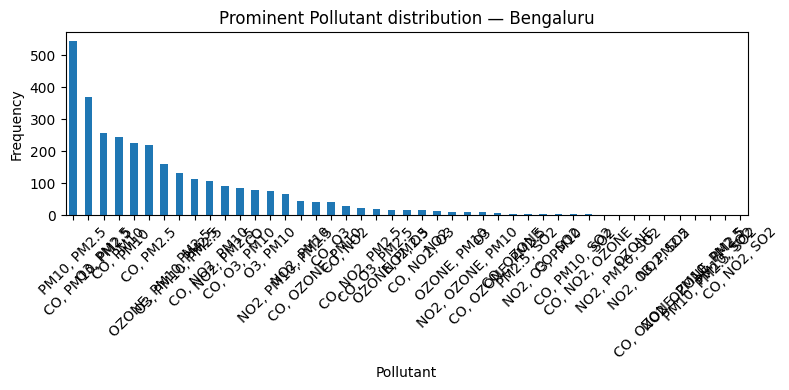

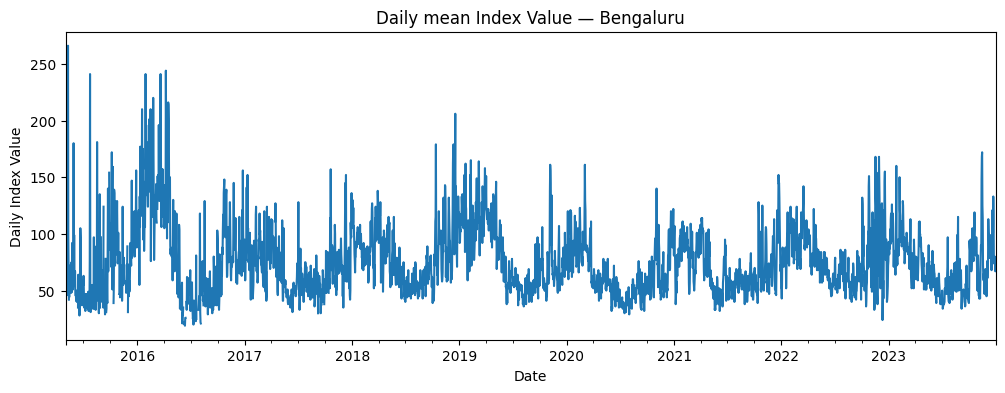

Forecast MAE: 11.879890022675736
Forecast RMSE: 16.926858156058593


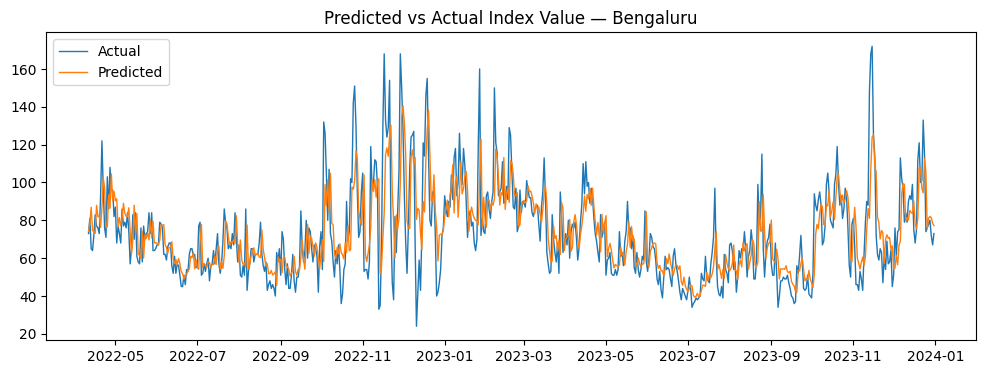

Anomalies detected (count): 64


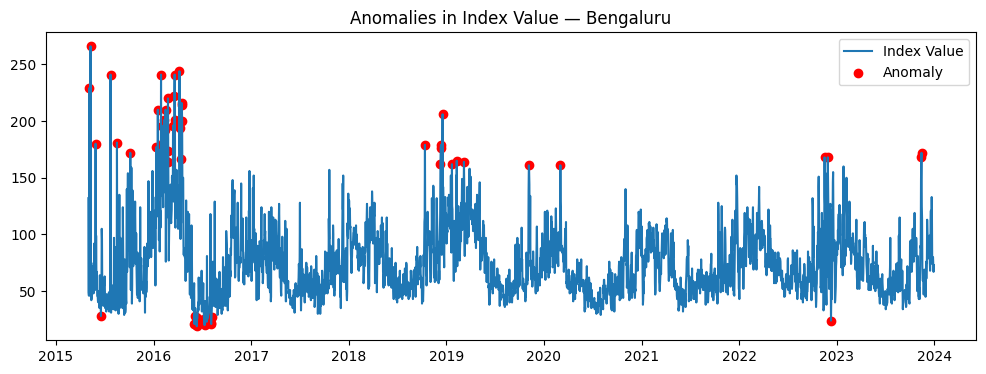

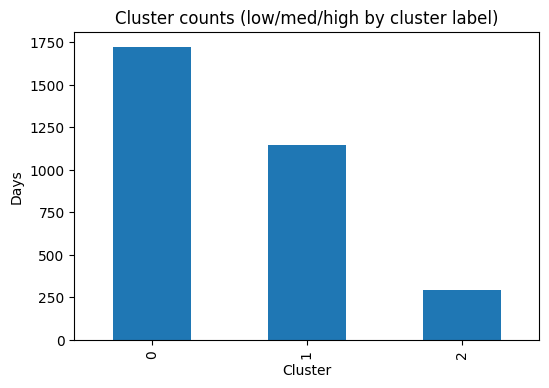

Cluster stats:


,cluster,count,mean,median,min,max
0,0,1725,53.561560,54.0,19.0,72.0
1,1,1146,90.696481,89.0,73.0,116.0
2,2,292,141.738014,133.0,117.0,266.0


Cluster ranges (cluster, min, max): [(0, 19.0, 72.0), (1, 73.0, 116.0), (2, 117.0, 266.0)]


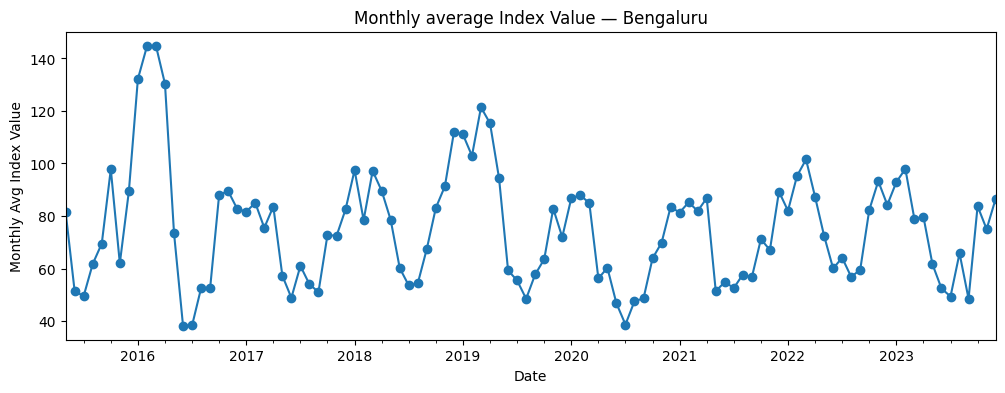

Monthly thresholds (clean/moderate/high): 60.99258064516129 83.41290322580646
Months categorized:


,count
Index Value,
High,36
Clean,34
Moderate,34


Months with consistently high pollution (examples): ['2015-10', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-10', '2016-11', '2017-02', '2017-04']
Automated seasonal insight:
For Bengaluru, months classified as 'High' pollution (above 83.41) include: 2015-10, 2015-12, 2016-01, 2016-02, 2016-03, 2016-04. Recommendation: prioritize mitigation in high months by restricting high-emission activities and increasing monitoring.


In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

candidates = [f for f in os.listdir("/content") if f.lower().endswith(".csv")]
csv_path = None
for fn in candidates:
    if any(k in fn.lower() for k in ("ncap","aqi","air","india","pollution")):
        csv_path = f"/content/{fn}"
        break
if csv_path is None and candidates:
    csv_path = f"/content/{candidates[0]}"
if csv_path is None:
    raise FileNotFoundError("No CSV found in /content. Upload the NCAP AQI CSV and re-run.")

df = pd.read_csv(csv_path)
print("Using file:", csv_path)
print("Columns:", df.columns.tolist())

if 'Date' not in df.columns:
    possible = [c for c in df.columns if 'date' in c.lower()]
    if possible:
        df.rename(columns={possible[0]:'Date'}, inplace=True)
if 'City' not in df.columns:
    possible = [c for c in df.columns if 'city' in c.lower()]
    if possible:
        df.rename(columns={possible[0]:'City'}, inplace=True)
if 'Index Value' not in df.columns:
    possible = [c for c in df.columns if 'index' in c.lower() or 'value' in c.lower() or 'aqi' in c.lower()]
    if possible:
        df.rename(columns={possible[0]:'Index Value'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date']).sort_values('Date').reset_index(drop=True)
available_cities = df['City'].unique().tolist()
print("Available cities (sample):", available_cities[:10])

city_name = available_cities[0]
print("Selected city:", city_name)
df_city = df[df['City'] == city_name].copy()
df_city = df_city.set_index('Date').sort_index()

if df_city['Index Value'].dtype == object:
    df_city['Index Value'] = pd.to_numeric(df_city['Index Value'], errors='coerce')

plt.figure(figsize=(12,4))
plt.plot(df_city.index, df_city['Index Value'], linewidth=1)
plt.title(f"Index Value Time Series — {city_name}")
plt.ylabel("Index Value")
plt.xlabel("Date")
plt.show()

missing = df_city['Index Value'].isna().sum()
print("Missing Index Value count:", missing)
abnormal = df_city[df_city['Index Value'] < 0]
print("Negative Index Value readings (count):", len(abnormal))
display(df_city[df_city['Index Value'].isna()].head())

plt.figure(figsize=(8,4))
if 'Prominent Pollutant' in df_city.columns:
    counts = df_city['Prominent Pollutant'].value_counts().sort_values(ascending=False)
    counts.plot(kind='bar')
    plt.title(f"Prominent Pollutant distribution — {city_name}")
    plt.ylabel("Frequency")
    plt.xlabel("Pollutant")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Prominent Pollutant' not found in dataset.")

daily = df_city['Index Value'].resample('D').mean()
plt.figure(figsize=(12,4))
daily.plot()
plt.title(f"Daily mean Index Value — {city_name}")
plt.ylabel("Daily Index Value")
plt.show()

series = daily.interpolate(limit=3).dropna()

def make_supervised(series, n_lags=14, horizon=1):
    Xs, ys, idx = [], [], []
    vals = series.values
    for i in range(n_lags, len(vals)-horizon+1):
        Xs.append(vals[i-n_lags:i])
        ys.append(vals[i + horizon - 1])
        idx.append(series.index[i])
    return np.array(Xs), np.array(ys), idx

n_lags = 14
X, y, idx = make_supervised(series, n_lags=n_lags, horizon=1)
if len(X) < 10:
    raise ValueError("Not enough data after resampling/interpolation to build supervised samples. Try reducing n_lags.")

split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
idx_train, idx_test = idx[:split_idx], idx[split_idx:]

X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_flat, y_train)
y_pred = model.predict(X_test_flat)

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("Forecast MAE:", mae)
print("Forecast RMSE:", rmse)

plt.figure(figsize=(12,4))
plt.plot(idx_test, y_test, label='Actual', linewidth=1)
plt.plot(idx_test, y_pred, label='Predicted', linewidth=1)
plt.title(f"Predicted vs Actual Index Value — {city_name}")
plt.legend()
plt.show()

vals = series.values.reshape(-1,1)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.02, random_state=42)
iso.fit(vals)
anoms = iso.predict(vals)
anomaly_idx = np.where(anoms == -1)[0]
print("Anomalies detected (count):", len(anomaly_idx))
plt.figure(figsize=(12,4))
plt.plot(series.index, series.values, label='Index Value')
plt.scatter(series.index[anomaly_idx], series.values[anomaly_idx], color='red', label='Anomaly')
plt.title(f"Anomalies in Index Value — {city_name}")
plt.legend()
plt.show()

daily_df = series.to_frame(name='Index Value')
daily_df['day_of_year'] = daily_df.index.dayofyear
scaler = StandardScaler()
X_cluster = scaler.fit_transform(daily_df[['Index Value']])
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
daily_df['cluster'] = kmeans.fit_predict(X_cluster)

counts = daily_df['cluster'].value_counts().sort_index()
plt.figure(figsize=(6,4))
counts.plot(kind='bar')
plt.title("Cluster counts (low/med/high by cluster label)")
plt.xlabel("Cluster")
plt.ylabel("Days")
plt.show()

cluster_stats = daily_df.groupby('cluster')['Index Value'].agg(['count','mean','median','min','max']).reset_index()
print("Cluster stats:")
display(cluster_stats)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_ranges = []
for i in range(k):
    mask = daily_df['cluster'] == i
    mn = daily_df.loc[mask,'Index Value'].min()
    mx = daily_df.loc[mask,'Index Value'].max()
    cluster_ranges.append((i, mn, mx))
print("Cluster ranges (cluster, min, max):", cluster_ranges)

monthly = df_city['Index Value'].resample('M').mean().dropna()
plt.figure(figsize=(12,4))
monthly.plot(marker='o')
plt.title(f"Monthly average Index Value — {city_name}")
plt.ylabel("Monthly Avg Index Value")
plt.show()

low_m = np.percentile(monthly.values, 33)
high_m = np.percentile(monthly.values, 66)
print("Monthly thresholds (clean/moderate/high):", low_m, high_m)

monthly_cat = pd.cut(monthly, bins=[-1e9, low_m, high_m, 1e9], labels=['Clean','Moderate','High'])
print("Months categorized:")
display(monthly_cat.value_counts())

high_months = monthly[monthly > high_m].index.strftime('%Y-%m').tolist()
print("Months with consistently high pollution (examples):", high_months[:10])

insight = f"For {city_name}, months classified as 'High' pollution (above {high_m:.2f}) include: {', '.join(high_months[:6])}. Recommendation: prioritize mitigation in high months by restricting high-emission activities and increasing monitoring."
print("Automated seasonal insight:")
print(insight)
